In [3]:
#check the direction

In [4]:
import os
print(os.getcwd())

C:\Program Files\Microsoft VS Code


In [5]:
import os

# Change to your project directory (update the path as needed)
os.chdir(r"H:\Regional_Water_Company\For_WR_Report\Fine_Reanalyze")

# Verify the change
print(os.getcwd())

H:\Regional_Water_Company\For_WR_Report\Fine_Reanalyze


In [ ]:
import pandas as pd

# Read the Excel file
Geo_Data = pd.read_excel("New_Merge_Data_dd.xlsx")
# Show the first 5 rows
print(Geo_Data.head())

                 point_name  Depth_1  Depth_2 Type_Geo Elevation  Total_Depth  \
0  abasabad tokhmanjir asma      0.0      3.0       GC      1057         26.6   
1  abasabad tokhmanjir asma      3.0      6.6       GP      1057         26.6   
2  abasabad tokhmanjir asma      6.6      9.4       CL      1057         26.6   
3  abasabad tokhmanjir asma      9.4     14.0       GP      1057         26.6   
4  abasabad tokhmanjir asma     14.0     15.5       CL      1057         26.6   

    Lon_D    Lat_D  Thickness_meters  Thickness_Percent  
0  59.429  36.5557               3.0          11.278195  
1  59.429  36.5557               3.6          13.533835  
2  59.429  36.5557               2.8          10.526316  
3  59.429  36.5557               4.6          17.293233  
4  59.429  36.5557               1.5           5.639098  


In [7]:
Geo_Data

,point_name,Depth_1,Depth_2,Type_Geo,Elevation,Total_Depth,Lon_D,Lat_D,Thickness_meters,Thickness_Percent
0,abasabad tokhmanjir asma,0.0,3.0,GC,1057,26.6,59.429,36.5557,3.0,11.278195
1,abasabad tokhmanjir asma,3.0,6.6,GP,1057,26.6,59.429,36.5557,3.6,13.533835
2,abasabad tokhmanjir asma,6.6,9.4,CL,1057,26.6,59.429,36.5557,2.8,10.526316
3,abasabad tokhmanjir asma,9.4,14.0,GP,1057,26.6,59.429,36.5557,4.6,17.293233
4,abasabad tokhmanjir asma,14.0,15.5,CL,1057,26.6,59.429,36.5557,1.5,5.639098
...,...,...,...,...,...,...,...,...,...,...
3146,zanaghel asma,39.0,41.0,GP,1158,64.0,59.159,36.6447,2.0,3.125000
3147,zanaghel asma,41.0,45.0,CL,1158,64.0,59.159,36.6447,4.0,6.250000
3148,zanaghel asma,45.0,46.0,GW,1158,64.0,59.159,36.6447,1.0,1.562500
3149,zanaghel asma,46.0,58.0,SP,1158,64.0,59.159,36.6447,12.0,18.750000


In [9]:
# Assuming the data is in a pandas DataFrame named 'df'
unique_layers = Geo_Data['Type_Geo'].unique().tolist()
print(unique_layers)

['GC', 'GP', 'CL', 'Undifind', 'GW', 'SM', 'CL- ML', 'BEDROCK', 'SP', 'SW', 'ML', 'OL', 'SC', 'CCL', 'CH', 'GM', 'GP-GM', 'SC-SM', '<Null>']


In [ ]:
## GC: Gravelly Clay → Fine-grained (clay-dominated with gravel)
# GP: Poorly Graded Gravel → Coarse-grained
# CL: Clay (Low Plasticity) → Fine-grained
# Undifind: Undefined → Uncategorized (likely a typo for 'Undefined')
# GW: Well-Graded Gravel → Coarse-grained
# SM: Silty Sand → Coarse-grained (sand-dominated with silt)
# CL-ML: Clay-Silt Mixture → Fine-grained
# BEDROCK: Bedrock → Uncategorized (not a soil type)
# SP: Poorly Graded Sand → Coarse-grained
# SW: Well-Graded Sand → Coarse-grained
# ML: Silt (Low Plasticity) → Fine-grained
# OL: Organic Silt/Clay → Fine-grained
# SC: Clayey Sand → Coarse-grained (sand-dominated with clay)
# CCL: Clay (Low Plasticity, alternative notation) → Fine-grained
# CH: Clay (High Plasticity) → Fine-grained
# GM: Gravelly Silt → Fine-grained (silt-dominated with gravel)
# GP-GM: Gravel-Silt Mixture → Coarse-grained (gravel-dominated)
# SC-SM: Sand-Silt Mixture → Coarse-grained
# <null></null>: Missing Data → Uncategorized

In [10]:
import pandas as pd

# Read the geological data
Geo_Data = pd.read_excel("New_Merge_Data_dd.xlsx")

# Define the geological layer abbreviations, full names, and categories
layer_definitions = {
    'GC': {'full_name': 'Gravelly Clay', 'category': 'Fine-grained'},
    'GP': {'full_name': 'Poorly Graded Gravel', 'category': 'Coarse-grained'},
    'CL': {'full_name': 'Clay (Low Plasticity)', 'category': 'Fine-grained'},
    'Undifind': {'full_name': 'Undefined', 'category': 'Uncategorized'},
    'GW': {'full_name': 'Well-Graded Gravel', 'category': 'Coarse-grained'},
    'SM': {'full_name': 'Silty Sand', 'category': 'Coarse-grained'},
    'CL-ML': {'full_name': 'Clay-Silt Mixture', 'category': 'Fine-grained'},
    'BEDROCK': {'full_name': 'Bedrock', 'category': 'Uncategorized'},
    'SP': {'full_name': 'Poorly Graded Sand', 'category': 'Coarse-grained'},
    'SW': {'full_name': 'Well-Graded Sand', 'category': 'Coarse-grained'},
    'ML': {'full_name': 'Silt (Low Plasticity)', 'category': 'Fine-grained'},
    'OL': {'full_name': 'Organic Silt/Clay', 'category': 'Fine-grained'},
    'SC': {'full_name': 'Clayey Sand', 'category': 'Coarse-grained'},
    'CCL': {'full_name': 'Clay (Low Plasticity)', 'category': 'Fine-grained'},
    'CH': {'full_name': 'Clay (High Plasticity)', 'category': 'Fine-grained'},
    'GM': {'full_name': 'Gravelly Silt', 'category': 'Fine-grained'},
    'GP-GM': {'full_name': 'Gravel-Silt Mixture', 'category': 'Coarse-grained'},
    'SC-SM': {'full_name': 'Sand-Silt Mixture', 'category': 'Coarse-grained'},
    '<Null>': {'full_name': 'Missing Data', 'category': 'Uncategorized'}
}

# Function to print layer definitions by category
def print_layer_categories():
    print("Geological Layer Classifications:\n")
    
    # Coarse-grained layers
    print("Coarse-grained Layers:")
    for abbr, info in layer_definitions.items():
        if info['category'] == 'Coarse-grained':
            print(f"  {abbr}: {info['full_name']}")
    
    print("\nFine-grained Layers:")
    for abbr, info in layer_definitions.items():
        if info['category'] == 'Fine-grained':
            print(f"  {abbr}: {info['full_name']}")
    
    print("\nUncategorized Layers:")
    for abbr, info in layer_definitions.items():
        if info['category'] == 'Uncategorized':
            print(f"  {abbr}: {info['full_name']}")

# Print the categorized layers
print_layer_categories()

# Optionally, add full names and categories to the DataFrame
Geo_Data['Full_Name'] = Geo_Data['Type_Geo'].map(lambda x: layer_definitions.get(x, {'full_name': 'Unknown'})['full_name'])
Geo_Data['Category'] = Geo_Data['Type_Geo'].map(lambda x: layer_definitions.get(x, {'category': 'Uncategorized'})['category'])

# Save the updated DataFrame back to Excel (optional)
Geo_Data.to_excel("New_Merge_Data_with_Layers.xlsx", index=False)

# Display a summary of the data with new columns
print("\nSample of Updated DataFrame:")
print(Geo_Data[['point_name', 'Type_Geo', 'Full_Name', 'Category']].head())

Geological Layer Classifications:

Coarse-grained Layers:
  GP: Poorly Graded Gravel
  GW: Well-Graded Gravel
  SM: Silty Sand
  SP: Poorly Graded Sand
  SW: Well-Graded Sand
  SC: Clayey Sand
  GP-GM: Gravel-Silt Mixture
  SC-SM: Sand-Silt Mixture

Fine-grained Layers:
  GC: Gravelly Clay
  CL: Clay (Low Plasticity)
  CL-ML: Clay-Silt Mixture
  ML: Silt (Low Plasticity)
  OL: Organic Silt/Clay
  CCL: Clay (Low Plasticity)
  CH: Clay (High Plasticity)
  GM: Gravelly Silt

Uncategorized Layers:
  Undifind: Undefined
  BEDROCK: Bedrock
  <Null>: Missing Data

Sample of Updated DataFrame:
                 point_name Type_Geo              Full_Name        Category
0  abasabad tokhmanjir asma       GC          Gravelly Clay    Fine-grained
1  abasabad tokhmanjir asma       GP   Poorly Graded Gravel  Coarse-grained
2  abasabad tokhmanjir asma       CL  Clay (Low Plasticity)    Fine-grained
3  abasabad tokhmanjir asma       GP   Poorly Graded Gravel  Coarse-grained
4  abasabad tokhmanjir asma

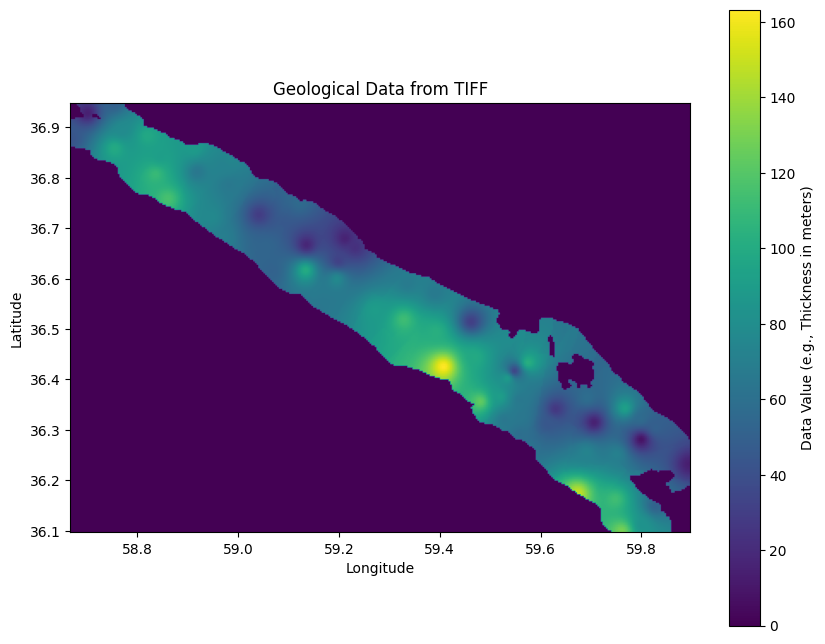

In [15]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Placeholder path for the TIFF file (replace with your actual file path)
tiff_path = "WL20241.tif"

try:
    # Open the TIFF file
    with rasterio.open(tiff_path) as src:
        # Read the first band of the TIFF (modify if multi-band data is needed)
        data = src.read(1)
        # Get the spatial extent for plotting
        extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

    # Mask invalid data (e.g., NoData values)
    data = np.ma.masked_invalid(data)

    # Create a plot
    plt.figure(figsize=(10, 8))
    im = plt.imshow(data, cmap='viridis', extent=extent)
    plt.colorbar(im, label='Data Value (e.g., Thickness in meters)')
    plt.title('Geological Data from TIFF')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(False)

    # Show the plot
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{tiff_path}' was not found. Please provide the correct path.")
except Exception as e:
    print(f"Error: Failed to process the TIFF file. Details: {str(e)}")

In [ ]:
# extract the data from tiff file and save in the excel file

import pandas as pd
import rasterio
from rasterio.transform import rowcol
import numpy as np

# File paths
tiff_path = "WL20241.tif"
excel_path = "New_Merge_Data_with_Layers.xlsx"
output_excel_path = "New_Merge_Data_with_Water_Level.xlsx"

try:
    # Load the Excel file
    df = pd.read_excel(excel_path)

    # Initialize lists for water levels and problematic rows
    water_levels = []
    problematic_rows = []

    # Open the GeoTIFF file
    with rasterio.open(tiff_path) as src:
        # Get the GeoTIFF's transform
        transform = src.transform
        # Read the first band
        raster_data = src.read(1)
        # Get NoData value
        nodata = src.nodata if src.nodata is not None else np.nan

        # Iterate through each row
        for idx, (lon, lat, point_name) in enumerate(zip(df['Lon_D'], df['Lat_D'], df['point_name'])):
            # Check for invalid or missing coordinates
            if pd.isna(lon) or pd.isna(lat) or str(lon).lower() == '<null>' or str(lat).lower() == '<null>':
                problematic_rows.append((idx, point_name, lon, lat))
                water_levels.append(np.nan)
                continue

            try:
                # Convert to float and validate
                lon = float(lon)
                lat = float(lat)

                # Convert geographic coordinates to pixel coordinates
                row, col = rowcol(transform, lon, lat)
                # Check if coordinates are within raster bounds
                if 0 <= row < raster_data.shape[0] and 0 <= col < raster_data.shape[1]:
                    value = raster_data[row, col]
                    # Check for NoData value
                    if value == nodata or np.isnan(value):
                        water_levels.append(np.nan)
                    else:
                        water_levels.append(value)
                else:
                    # Coordinates outside raster bounds
                    water_levels.append(np.nan)
                    problematic_rows.append((idx, point_name, lon, lat))
            except (ValueError, TypeError) as e:
                # Handle non-numeric coordinates
                problematic_rows.append((idx, point_name, lon, lat))
                water_levels.append(np.nan)

    # Add water level values to the DataFrame
    df['Water_Level_Depth'] = water_levels

    # Save the updated DataFrame
    df.to_excel(output_excel_path, index=False)
    print(f"Updated Excel file saved to: {output_excel_path}")

    # Display a sample of the updated DataFrame
    print("\nSample of Updated DataFrame with Water Level:")
    print(df[['point_name', 'Lon_D', 'Lat_D', 'Water_Level_Depth']].head())

    # Report problematic rows
    if problematic_rows:
        print("\nRows with Invalid or Out-of-Bounds Coordinates:")
        for idx, point_name, lon, lat in problematic_rows:
            print(f"Row {idx}: Point = {point_name}, Lon = {lon}, Lat = {lat}")

except FileNotFoundError as e:
    print(f"Error: File not found. Check paths: {tiff_path}, {excel_path}. Details: {str(e)}")
except Exception as e:
    print(f"Error: Failed to process files. Details: {str(e)}")

Updated Excel file saved to: New_Merge_Data_with_Water_Level.xlsx

Sample of Updated DataFrame with Water Level:
                 point_name   Lon_D    Lat_D  Water_Level_Depth
0  abasabad tokhmanjir asma  59.429  36.5557          72.269569
1  abasabad tokhmanjir asma  59.429  36.5557          72.269569
2  abasabad tokhmanjir asma  59.429  36.5557          72.269569
3  abasabad tokhmanjir asma  59.429  36.5557          72.269569
4  abasabad tokhmanjir asma  59.429  36.5557          72.269569

Rows with Invalid or Out-of-Bounds Coordinates:
Row 1458: Point = joeh paien4 asma, Lon = <Null>, Lat = <Null>
Row 1459: Point = joeh paien4 asma, Lon = <Null>, Lat = <Null>
Row 1460: Point = joeh paien4 asma, Lon = <Null>, Lat = <Null>
Row 1461: Point = joeh paien4 asma, Lon = <Null>, Lat = <Null>
Row 1462: Point = joeh paien4 asma, Lon = <Null>, Lat = <Null>
Row 1463: Point = joeh paien4 asma, Lon = <Null>, Lat = <Null>
Row 1464: Point = joeh paien4 asma, Lon = <Null>, Lat = <Null>
Row 1465: Poi

In [ ]:
# Filter the data based on the water level depth 

import pandas as pd
import numpy as np

# File paths
input_excel_path = "New_Merge_Data_with_Water_Level.xlsx"
output_excel_path = "New_Merge_Data_Filtered_by_Water_Level.xlsx"

try:
    # Load the Excel file
    df = pd.read_excel(input_excel_path)

    # Initialize a list to store indices of rows to keep
    rows_to_keep = []

    # Filter rows where Depth_2 <= Water_Level_Depth
    for idx, row in df.iterrows():
        water_level = row['Water_Level_Depth']
        depth_2 = row['Depth_2']

        # Check if water_level is valid (not NaN or <Null>)
        if pd.isna(water_level) or str(water_level).lower() == '<null>':
            continue  # Skip rows with invalid water level data

        # Keep row if the layer's bottom depth is less than or equal to water level depth
        if depth_2 <= water_level:
            rows_to_keep.append(idx+1)

    # Create filtered DataFrame
    filtered_df = df.loc[rows_to_keep].copy()

    # Save the filtered DataFrame to a new Excel file
    filtered_df.to_excel(output_excel_path, index=False)
    print(f"Filtered Excel file saved to: {output_excel_path}")
    print(f"Original number of rows: {len(df)}")
    print(f"Filtered number of rows: {len(filtered_df)}")

    # Display a sample of the filtered DataFrame
    print("\nSample of Filtered DataFrame (Layers Above Water Table):")
    print(filtered_df[['point_name', 'Depth_1', 'Depth_2', 'Type_Geo', 'Water_Level_Depth']].head())

except FileNotFoundError as e:
    print(f"Error: File not found. Check path: {input_excel_path}. Details: {str(e)}")
except Exception as e:
    print(f"Error: Failed to process file. Details: {str(e)}")

Filtered Excel file saved to: New_Merge_Data_Filtered_by_Water_Level.xlsx
Original number of rows: 3151
Filtered number of rows: 1752

Sample of Filtered DataFrame (Layers Above Water Table):
                 point_name  Depth_1  Depth_2 Type_Geo  Water_Level_Depth
1  abasabad tokhmanjir asma      3.0      6.6       GP          72.269569
2  abasabad tokhmanjir asma      6.6      9.4       CL          72.269569
3  abasabad tokhmanjir asma      9.4     14.0       GP          72.269569
4  abasabad tokhmanjir asma     14.0     15.5       CL          72.269569
5  abasabad tokhmanjir asma     15.5     20.2       GC          72.269569


In [ ]:
# Replace the Total_Depth column for each point with the corresponding Water_Level_Depth value
# Replace the Total_Depth column for each point with the corresponding Water_Level_Depth value
# Replace the Total_Depth column for each point with the corresponding Water_Level_Depth value


import pandas as pd
import numpy as np

# File paths
input_excel_path = "New_Merge_Data_Filtered_by_Water_Level.xlsx"
output_excel_path = "New_Merge_Data_Updated_Depths.xlsx"

try:
    # Load the Excel file
    df = pd.read_excel(input_excel_path)

    # Initialize lists for problematic rows
    problematic_rows = []

    # Group by point_name to ensure consistent Total_Depth per point
    grouped = df.groupby('point_name')

    # Function to update Total_Depth and recalculate Thickness columns
    def update_point_group(group):
        # Get the first valid Water_Level_Depth (should be same for all rows in group)
        water_level = group['Water_Level_Depth'].dropna()
        if water_level.empty or str(water_level.iloc[0]).lower() == '<null>':
            problematic_rows.append((group.name, 'Missing or invalid Water_Level_Depth'))
            return None  # Skip group with no valid water level

        water_level = float(water_level.iloc[0])
        if water_level == 0:
            problematic_rows.append((group.name, 'Water_Level_Depth is zero'))
            return None  # Skip to avoid division by zero

        # Update Total_Depth
        group['Total_Depth'] = water_level

        # Recalculate Thickness_meters
        group['Thickness_meters'] = group['Depth_2'] - group['Depth_1']

        # Recalculate Thickness_Percent
        group['Thickness_Percent'] = (group['Thickness_meters'] / group['Total_Depth']) * 100

        return group

    # Apply updates to each group
    updated_df = grouped.apply(update_point_group).reset_index(drop=True)

    # Remove any None groups (those with invalid water levels)
    if updated_df is not None:
        updated_df = updated_df.dropna(subset=['Total_Depth'])

    # Save the updated DataFrame
    updated_df.to_excel(output_excel_path, index=False)
    print(f"Updated Excel file saved to: {output_excel_path}")
    print(f"Original number of rows: {len(df)}")
    print(f"Updated number of rows: {len(updated_df)}")

    # Display a sample of the updated DataFrame
    print("\nSample of Updated DataFrame:")
    print(updated_df[['point_name', 'Depth_1', 'Depth_2', 'Type_Geo', 'Total_Depth', 
                     'Thickness_meters', 'Thickness_Percent', 'Water_Level_Depth']].head())

    # Report problematic points
    if problematic_rows:
        print("\nProblematic Points:")
        for point_name, issue in problematic_rows:
            print(f"Point: {point_name}, Issue: {issue}")

except FileNotFoundError as e:
    print(f"Error: File not found. Check path: {input_excel_path}. Details: {str(e)}")
except Exception as e:
    print(f"Error: Failed to process file. Details: {str(e)}")

C:\Users\AAAli\AppData\Local\Temp\ipykernel_2488\2474455522.py:43: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  updated_df = grouped.apply(update_point_group).reset_index(drop=True)


Updated Excel file saved to: New_Merge_Data_Updated_Depths.xlsx
Original number of rows: 1752
Updated number of rows: 1748

Sample of Updated DataFrame:
      point_name  Depth_1  Depth_2 Type_Geo  Total_Depth  Thickness_meters  \
0  AbfaBazarReza     10.0     37.0       GC    54.741631              27.0   
1  AbfaBazarReza     37.0     75.0   CL- ML    54.741631              38.0   
2  AbfaChenaran1     10.0     15.0       SM    59.647648               5.0   
3  AbfaChenaran1     15.0     25.0   CL- ML    59.647648              10.0   
4  AbfaChenaran1     25.0     30.0   CL- ML    59.647648               5.0   

   Thickness_Percent  Water_Level_Depth  
0          49.322608          54.741631  
1          69.417004          54.741631  
2           8.382560          59.647648  
3          16.765120          59.647648  
4           8.382560          59.647648  

Problematic Points:
Point: kalateh bolorian1, Issue: Missing or invalid Water_Level_Depth
Point: kalateh milan, Issue: Missin